
  <font size= 15>
 <font color='red'>
Leslie Population dynamics
 </font> 
  </font> 

### José Ángel Tinoco Carrillo 

## **What is the Leslie model for population dynamics?** 

In short, it is a set of mathematical formulas intended to show the progress of the population of a single species as it goes through its different stages of life;
for example, to model the growth of a group of tiny kitties...

<img src="https://storage.needpix.com/rsynced_images/kittens-1075978_1280.jpg" width="400">

To enormous, city-destroying beasts!

<img src="https://w0.peakpx.com/wallpaper/310/724/HD-wallpaper-d-airplane-kitten-city-fantasy-funny-cat-giant-fire.jpg" width="400">



" *If we are given the age distribution of a population on a certain date, we may require to
know the age distribution of the survivors and descendants of the original population at
successive intervals of time, supposing that these individuals are subject to some given age-
specific rates of fertility and mortality.* "  <br>(P.H. Leslie, 1945)

Thats the question Leslie himself was looking to answer when he developed Leslie population dynamics models. These models work by dividing the life of an organism into arbitrary age groups, for example "Year 1, Year 2, Year 3, Year 4...", or  "Toddler, Child, Adolescent, Adult, Elderly", etc.
By dividing life into these age groups, we can monitor the development of the population by setting up some key parameters for each group, which are expressed as chances:
-  Survival rate (how many individuals survive and advance to a later age group/make it to next "cycle" alive?)
-  Reproduction rate (how much do individuals reproduce in each stage of their lives?)

Both parameters boil down to the essential question

What are the chances for an age group of successfully moving into another?

And with this there are some conclusions we can draw to make the model easier to understand:
- Chance of baby individuals reproducing is always 0%, as babies don´t have offspring. 
- Chances of adult individuals transitioning to younger groups are null, as de-aging is not a thing in most species, but groups may have chances to "turn" into the youngest group, as that is the way the model expresses reproductive rates.
- Chances don´t have to add up to 1, if they are < 1, it means a part of that age group died, but chances can add up to more than one, for reproductive rates may bump the cumulative chances over 100%, as new individuals pop up.

These parameters are expressed in a matrix, a ***Leslie*** matrix:

<img src="images/matrix_functioning.png" width="800">



<font size= 2>
(Kajin et. al, 2012)
  </font> 

In the image above we see a matrix and two arrays:

- The leslie matrix, which houses *F* chances, which represent fecundity rates, and *P* chances, which represent the probabilty of each age group of transitioning into another.
- The t array has the population of each age group in time *t*, i.e. the current population of each age group.
- The t+1 array, which has the population of each group after some specified time.

Thus the model works by multiplying the Leslie matrix by the t array, resulting in the t+1 array. After that, the t+1 array becomes the t array, and the process repeats, 
**and each cycle shows how the populations evolve over time!**

## **Limitations of Leslie population models** 

" *It is important to remember that MPMs are approximations, both because they still abstract away much biological detail and because demographic measurements are imprecise* "  <br>(Kendall et. al., 2019)

Leslie population models are nice and all; they allow us to have a scientific and numeric based approach to population dynamics,/ but the question remains, how accurate/reliable are they?<br>Lets imagine for a second we are tasked with examining a duck population, and we resolve to analyze their population using a Leslie population model.

<img style="float: left;padding: 10px;" src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*m5HORF0koybAypPeBRbMjQ.jpeg" width="500"> <br> Then lets imagine these ducks are running extinct , but for some reason, like a mistake in analyzing their numbers in the wild, overly generous chances being placed in the leslie matrix, or some other mistake when making the model, resulting in the model showing stable populations. In this hypothetical, the model would arrive to a misleading conclusion, no special measures would be taken to protect the ducks, and those guys would go extinct.<br> 
Moreover, models like this pre suppose stable and plentiful resources, conditions which many times are not met in real life, which may give inaccurate results, not representing real life in an adequate way.<br>
So it is important to remember that these models are mathematical daydreams, and while they help us understand things, they are not **the** things themselves, and it is important to study real stuff to confirm or deny the findings of mathematical models. <br>
<BR><BR><BR><BR><BR><BR><BR>
Or, in internet lingo, it is nice to be inside in your computer all day, but...

<img src="https://i.ytimg.com/vi/gT4RDSGqdYU/maxresdefault.jpg" width="300">



## **Leslie population models test drive**

Now that we know our vehicle, its time for a test drive, will our shiny new car be a broken down old model, or will it drive fast and swiftly like a F1 car? <br>
For our first test, I´m bringing an old favorite of mine: <br>
DINOSAURS!

<img style="float: left;padding: 10px;" src="https://www.thoughtco.com/thmb/GIEDp80BQzKLa_vjCdZeVYaMxuI=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-680791823-59af09edaad52b0010486221.jpg" width="600">
Of course, there is no data to go off from, as dinosaurs are long dead, but we can build a hypothetical Leslie matrix using literature, more specifically, info on extant (living) animal species.
<br>
<img src="images/dino_comparison.png" width="800">
(Griebeler & Werner, 2011) <br>
As seen from the picture above, there have been some comparisons in literature between sauropod dinosaurs and extant taxa, so it is a question of finding Leslie matrixes from these living animals, and changing them based on these comparisons. 

So, for reference, I´ll start off with american crocodile (*Crocodylus acutus*) data...

<img src="images/crocodiles.png" width="800"> 
<font size= 2>
Leslie Matrix from COMADRE database.
  </font> 

And tweak the data to design a Leslie matrix for our long-necked, long-dead friends.

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
import time
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import clear_output

In [2]:
#Set up the leslie matrix , I made some changes taking into account the literature above.
A = np.asarray([[0.0, 0.0, 2,2,5], [0.204, 0.394, 0.0,0.0,0.0], [0.0, 0.256, 0.738,0.0,0.0], [0.0, 0.0, 0.049,0.474,0.0], [0.0, 0.0, 0.0,0.426,0.85]])
print(A)

[[0.    0.    2.    2.    5.   ]
 [0.204 0.394 0.    0.    0.   ]
 [0.    0.256 0.738 0.    0.   ]
 [0.    0.    0.049 0.474 0.   ]
 [0.    0.    0.    0.426 0.85 ]]


In [3]:
#Set up initial population values, we will suppose we start with 25 of each
b0 = np.array([0, 25.0, 25.0, 25.0, 25.0, 25.0])
#Set up a dataframe to store population values
columns = ['Time (Years)', 'Hatchlings', 'Juveniles', 'Sub-adults', 'Young adults', 'Mature adults']
b0_reshaped = b0.reshape(1,6)  # Reshape b0 to have shape (1, 6)
Pop_table = pd.DataFrame(b0_reshaped, columns=columns)
#For loop that makes concatenates the results of each iteration into a single dataframe!
#I ran my simulation for an arbitrary duration of 5 years
#AI helped a little bit setup the loop and integrating the new rows into the dataframe
for year in range (1,6):
    b0=b0[1:]
    b1= A@b0
    b0 = np.insert(b1, 0, year, axis=0)
    b0_reshaped = b0.reshape(1,6)
    Pop_table = pd.concat([Pop_table, pd.DataFrame((np.round(b0_reshaped).astype(int)), columns=columns)], ignore_index=True)
Pop_table['Total'] = Pop_table[['Hatchlings', 'Juveniles', 'Sub-adults', 'Young adults', 'Mature adults']].sum(axis=1)
#Tidy data is best data
tidy_table = pd.melt(Pop_table, id_vars='Time (Years)', value_vars=['Hatchlings', 'Juveniles', 'Sub-adults', 'Young adults', 'Mature adults', 'Total'], var_name='Stage', value_name='Population')
print(Pop_table)

   Time (Years)  Hatchlings  Juveniles  Sub-adults  Young adults  \
0           0.0        25.0       25.0        25.0          25.0   
1           1.0       225.0       15.0        25.0          13.0   
2           2.0       235.0       52.0        22.0           7.0   
3           3.0       223.0       68.0        30.0           5.0   
4           4.0       223.0       72.0        39.0           4.0   
5           5.0       227.0       74.0        48.0           4.0   

   Mature adults  Total  
0           25.0  125.0  
1           32.0  310.0  
2           33.0  349.0  
3           31.0  357.0  
4           28.0  366.0  
5           26.0  379.0  


Text(0.5, 1.0, 'Sauropod populations over time')

findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.


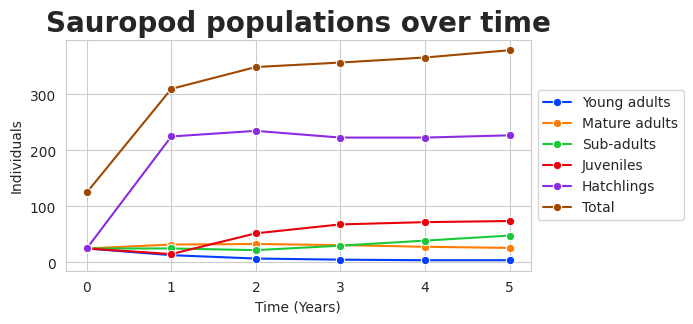

In [4]:
#Plotting population of each group in a single lineplot
fig = plt.figure(figsize=(6, 3))
ax = plt.axes()
stage_list = tidy_table.groupby('Stage')['Population'].last().sort_values().index
palette = sns.color_palette('bright', len(stage_list))
i=0
for stages in stage_list:
    sns.lineplot(ax=ax,
             data=tidy_table.loc[tidy_table['Stage']==stages],
             y='Population',
             x='Time (Years)',
             hue='Stage',
             marker='o', 
             palette=[palette[i]])
    i=i+1
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('Individuals')
ax.set_title('Sauropod populations over time', weight='bold',fontname='Verdana', size=20)

findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.
findfont: Font family 'Verdana' not found.


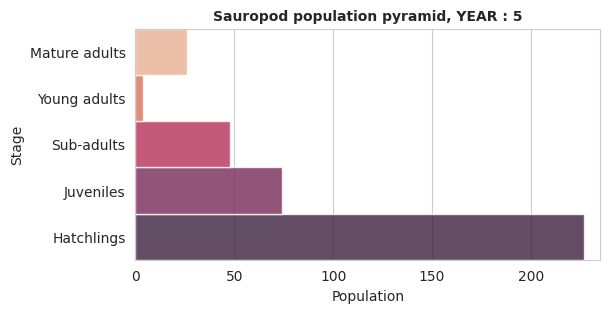

In [5]:
#Now for an animated population pyramid in each year
tidy_table=tidy_table.loc[tidy_table['Stage']!="Total"]
stage_order = tidy_table['Stage'].unique()[::-1]
for year in Pop_table['Time (Years)']:
    fig = plt.figure(figsize=(6, 3))
    ax = plt.axes()
    sns.barplot(
        ax=ax,
        data=tidy_table.loc[tidy_table['Time (Years)'] == year],
        x='Population',
        y='Stage',
        hue='Stage',
        palette='rocket',
        alpha=0.8,
        orient='horizontal',
        width=1,
        order=list(stage_order) 
    )
    ax.set_title('Sauropod population pyramid, YEAR : ' + str(int(year)), weight='bold', fontname='Verdana', size=10)
    ax.set_xlim([0, max(tidy_table['Population'])]) 
    time.sleep(3)
    clear_output(wait=True)      #Delete/inactivate this line in order to see all pop pyramyds from all years.
    plt.show()

As can be seen in the scenario proposed, the population growth shows a pattern often hypothesized for these animals: there are lots of hatchlings, but since young sauropod dinosaurs had no defense of their own, many of them perish in the lower stages of their lives. However, once those animals reached maturity and the latter stages of their lives, their massive size alone guaranteed that adult individuals would live long lives.

Now I went for a real challenge, I employed the asian elephant matrix from the COMADRE database, which has a colossal 26 by 26 size!

I included the matrix in the zip file within the images folder, and included the origin in references.

In [6]:
#Set up the leslie matrix, lifted from the one stored in the csv file.
matrix=pd.read_csv('images/matrix.csv')
matrix=matrix[3:29]
matrix = matrix.drop(matrix.columns[26:].tolist(), axis=1)
matrix = matrix.astype(float)
matrix=np.asarray(matrix)

In [7]:
#I proposed an initial population of middle aged adult elephants in reproductive age
b0 = np.zeros(27)
b0[9]=100.0
b0[10]=100.0
b0[22]=100.0
b0[23]=100.0
print(b0)

[  0.   0.   0.   0.   0.   0.   0.   0.   0. 100. 100.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 100. 100.   0.   0.   0.]


In [8]:
columns = ['Time (Years)','Female 0-4.9', 'Female 5-9.9', 'Female 10-14.9', 'Female 15-19.9', 'Female 20-24.9',
                'Female 25-29.9', 'Female 30-34.9 yrs: active', 'Female 35-39.9 yrs: active',
                'Female 40-44.9 yrs: active', 'Female 45-49.9 yrs: active', 'Female 50-54.9 yrs: active',
                'Female 55-59.9 yrs: active', 'Female 60+ yrs: active', 'Male 0-4.9 yrs: active',
                'Male 5-9.9 yrs: active', 'Male 10-14.9 yrs: active', 'Male 15-19.9 yrs: active',
                'Male 20-24.9 yrs: active', 'Male 25-29.9 yrs: active', 'Male 30-34.9 yrs: active',
                'Male 35-39.9 yrs: active', 'Male 40-44.9 yrs: active', 'Male 45-49.9 yrs: active',
                'Male 50-54.9 yrs: active', 'Male 55-59.9 yrs: active', 'Male 60+ yrs: active']
columns = [name.replace(' yrs: active', '') for name in columns]
b0_reshaped = b0.reshape(1,27)
Pop_table_elephants = pd.DataFrame(b0_reshaped, columns=columns)
for cycle in range (1,21):
    b0=b0[1:]
    b1 = matrix @ b0
    b0 = np.insert(b1.astype(float), 0, cycle*5.0, axis=0)
    b0_reshaped = b0.reshape(1,27)
    Pop_table_elephants = pd.concat([Pop_table_elephants, pd.DataFrame((np.round(b0_reshaped).astype(int)), columns=columns)], ignore_index=True)
Pop_table_elephants['Total'] = Pop_table_elephants.iloc[:, 1:].sum(axis=1)
print(Pop_table_elephants)

    Time (Years)  Female 0-4.9  Female 5-9.9  Female 10-14.9  Female 15-19.9  \
0            0.0           0.0           0.0             0.0             0.0   
1            5.0         100.0           0.0             0.0             0.0   
2           10.0          95.0          76.0             0.0             0.0   
3           15.0          73.0          72.0            71.0             0.0   
4           20.0          27.0          56.0            67.0            66.0   
5           25.0          33.0          20.0            52.0            62.0   
6           30.0          59.0          25.0            19.0            48.0   
7           35.0          78.0          45.0            23.0            18.0   
8           40.0          80.0          59.0            42.0            22.0   
9           45.0          86.0          61.0            55.0            39.0   
10          50.0         101.0          66.0            57.0            51.0   
11          55.0         119.0          

In [9]:
#More tidy tables
male_table = Pop_table_elephants['Time (Years)']
male_table = pd.concat([male_table, Pop_table_elephants.iloc[:, 14:27]], axis=1)
male_table['Total_males'] = male_table.iloc[:, 1:].sum(axis=1)
columns_m=male_table.columns
males_tidy=pd.melt(male_table, id_vars='Time (Years)', value_vars=columns_m[1:-1], var_name='Stage', value_name='Population')

In [10]:
female_table = Pop_table_elephants.iloc[:, 0:14]
female_table['Total_females'] = female_table.iloc[:, 1:].sum(axis=1)
female_table
columns_f=female_table.columns
females_tidy=pd.melt(female_table, id_vars='Time (Years)', value_vars=columns_f[1:-1], var_name='Stage', value_name='Population')

In [11]:
#Tables to see how the proportions of each sex changed over time
sorted_table_males = males_tidy.groupby('Time (Years)').sum().reset_index()
sorted_table_females= females_tidy.groupby('Time (Years)').sum().reset_index()
sorted_table_males['Pop_percent']=sorted_table_males['Population']/Pop_table_elephants['Total']
sorted_table_females['Pop_percent']=sorted_table_females['Population']/Pop_table_elephants['Total']

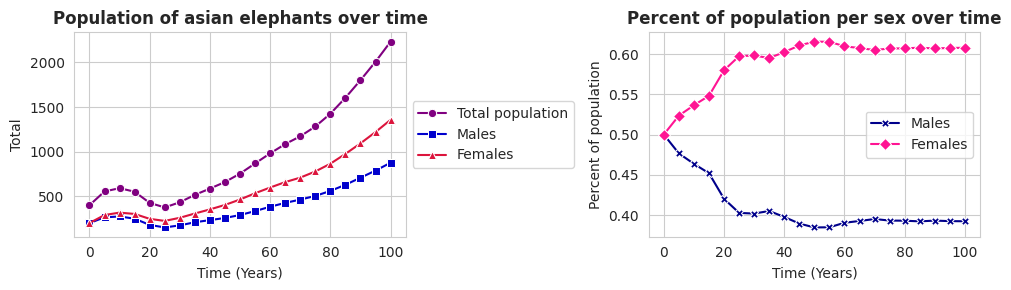

In [12]:
fig,((ax1,ax2))=plt.subplots(1,2,figsize=(10,3))
data_list=[Pop_table_elephants,male_table,female_table]
marker_list=['o','s','^']
color_list=['purple','mediumblue','crimson']
label_list=['Total population','Males','Females']
y_names=['Total','Total_males','Total_females']
for i in range (0,3):
    sns.lineplot(ax=ax1,
    data=data_list[i],
    y=y_names[i],
    x='Time (Years)',
    marker=marker_list[i], 
    label= label_list[i],
    color=color_list[i]
)
data_list=[sorted_table_males,sorted_table_females]
marker_list=['X','D']
color_list=['darkblue','deeppink']
label_list=['Males','Females']
for i in range (0,2):
    sns.lineplot(ax=ax2,
                data=data_list[i],
                x='Time (Years)',
                y='Pop_percent',
                marker=marker_list[i], 
                label= label_list[i],
                color=color_list[i] )
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_ylabel('Percent of population')
ax1.set_title('Population of asian elephants over time', weight='bold')
ax2.set_title('Percent of population per sex over time', weight='bold')
plt.tight_layout()

In [13]:
#Now for another animation, I tried to use plotly express, but that doesn´t support subplots, so I did something similar to the last one
#AI worked overtime to set up finer details like the layout, and helped me learning plotly in general
years=males_tidy['Time (Years)'].unique()
for year in years:
        fig = make_subplots(rows=1, cols=2, subplot_titles=("Females", "Males"), horizontal_spacing=0.01)
        max_population = max(males_tidy['Population'].max(), females_tidy['Population'].max())
        fig.update_xaxes(range=[-max_population,0], row=1, col=1)
        fig.update_xaxes(range=[0, max_population], row=1, col=2)

        male_pop=males_tidy.loc[males_tidy["Time (Years)"]==year ]
        fig.add_trace(
            go.Bar(
                x=male_pop['Population'],
                y=male_pop['Stage'],
                name='Males',
                marker_color='cornflowerblue',
                orientation='h',
                showlegend=False
            ),
            row=1, col=2
            )
        female_pop=females_tidy.loc[females_tidy["Time (Years)"]==year ]

        fig.add_trace(
        go.Bar(
            x=female_pop['Population'] * -1,
            y=female_pop['Stage'],
            name='Females',
            marker_color='lightcoral',
            orientation='h',
            showlegend=False,
             hoverlabel=dict(
            align='left'  
        )
        ),
        row=1, col=1
    )

        fig.update_layout(
        title=("Population Pyramid year " + str(int(year))) ,
        xaxis=dict(title="Population counts",gridcolor='lightgrey'),
        yaxis=dict(title="Age"),
        plot_bgcolor='ghostwhite',
        yaxis2=dict(side='right'),
        xaxis2=dict(title="Population counts",gridcolor='lightgrey')
)

        fig.show()
        time.sleep(3)
        clear_output(wait=True)  #Delete/inactivate this line in order to see all pop pyramyds from all years.


The population pyramid reveals a hidden fact within this Leslie matrix: male Asian elephants have lower overall survival rates than their female counterparts, resulting in communities with more females than males. While this fact may seem alarming at first glance, it makes evolutionary sense. To ensure the reproductive success of the community, a large number of females and few males are necessary. This is because while a female can be pregnant with one baby elephant at a time, a male elephant can father offspring with many females. Therefore, despite this population dynamic, elephant communities do not die out. Overall, this population structure functions effectively.

## **Conclusions**

Leslie population models are powerful mathematical tools for understanding population dynamics and predicting the development of populations of various sizes. They have proven to be valuable in fields such as biology, ecology, and conservation. However, field research remains essential to gather accurate and real data, providing a more comprehensive understanding of population phenomena.


## References 
Kajin, M., Almeida, P. J., Vieira, M. V., & Cerqueira, R. (2012). The state of the art of population projection models: from the Leslie matrix to evolutionary demography. Oecologia Australis, 16(1), 13-22.

Leslie, P. H. (1945). On the Use of Matrices in Certain Population Mathematics. Biometrika, 33(3), 183–212. https://doi.org/10.2307/2332297

Kendall, B. E., Fujiwara, M., Diaz-Lopez, J., Schneider, S., Voigt, J., & Wiesner, S. (2019). Persistent problems in the construction of matrix population models. Ecological modelling, 406, 33-43.

Griebeler, E. M., & Werner, J. (2011). The life cycle of sauropod dinosaurs. Biology of the sauropod dinosaurs: Understanding the life of giants, 263-275.

COMADRE database. *Crocodylus acutus* .Retrieved from: https://compadre-db.org/Species/48350

COMADRE database. *Elephas maximus* .Retrieved from: https://compadre-db.org/Species/48281